In [1]:
import pandas as pd

# Load your cleaned and preprocessed delivery data
df = pd.read_csv("../data/serviceable_deliveries.csv")
print(df.head())
print(df.columns)  # Verify the columns (lat, lng, pinCode, distance_from_hub_km, etc.)


   ID  hubId                                            address  pinCode  \
0   1      3  VENKATARANANA MOTORS, KONDAPUR VILLAGE, HYDERA...   500084   
1   2      3  CTRLS Datacenters Ltd, Nanakramguda, Hyderabad...   500032   
2   3      3     T-HUB FOUNDATION, RAIDURGAM, HYDERABAD, 500081   500081   
3   4      3  SANGEETHA MOBILES, MAIN ROAD, PILAPNO C-122, M...   500081   
4   5      3               SANGEETHA Mobiles, HYDERABAD, 500081   500001   

                                  coordinates          fid        lat  \
0         {"lat":17.4426289,"lng":78.3630084}  58897186913  17.442629   
1         {"lat":17.4233287,"lng":78.3303868}  58912701702  17.423329   
2           {"lat":17.434079,"lng":78.378788}  58150388192  17.434079   
3         {"lat":17.3737353,"lng":78.5371694}  58150367671  17.373735   
4  {"lat":17.3683903,"lng":78.57637150000001}  58150367671  17.368390   

         lng  distance_from_hub_km  
0  78.363008             23.617995  
1  78.330387             22.70

In [2]:
distance_threshold_km = 35
nearby = df[df['distance_from_hub_km'] <= distance_threshold_km]
print(f"Number of deliveries within {distance_threshold_km} km: {len(nearby)}")


Number of deliveries within 35 km: 63


In [3]:
min_lat, max_lat = nearby['lat'].min(), nearby['lat'].max()
min_lng, max_lng = nearby['lng'].min(), nearby['lng'].max()

# Optional: add a buffer so you get all relevant roads
buffer = 0.01
north, south = max_lat + buffer, min_lat - buffer
east, west = max_lng + buffer, min_lng - buffer


In [8]:
data_path = '../data/ApexHub_Deliveries.xlsx'
dc = pd.read_excel(data_path, sheet_name='Distribution Center Location ')
hub_lat, hub_lng = map(float, dc['Hub Coordinates'][0].split(','))
hub_point = (hub_lat, hub_lng)

MultiDiGraph with 293313 nodes and 756339 edges


C:\Users\Javier Alfaro\Dropbox\Master\Upwork\routing\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


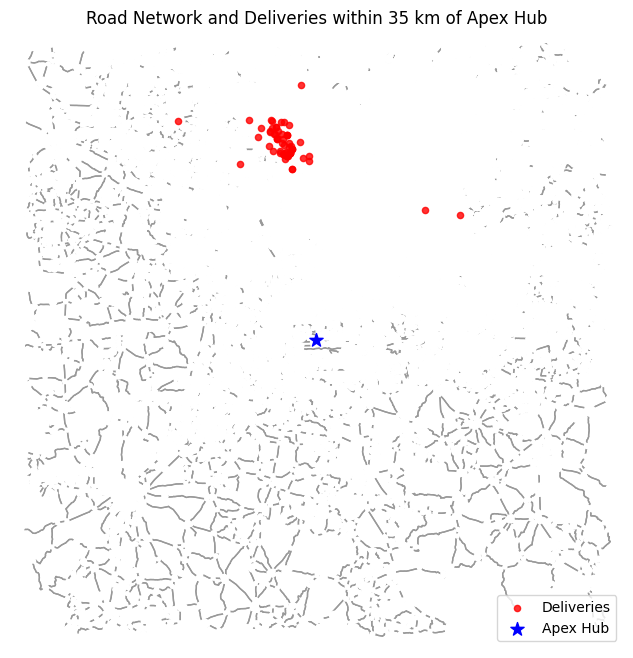

In [20]:
import matplotlib.pyplot as plt

radius_meters = 35_000  # km in meters
radius_km = radius_meters / 1000
G = ox.graph_from_point(hub_point, dist=radius_meters, network_type='drive_service')
print(G)

fig, ax = ox.plot_graph(G, show=False, close=False, bgcolor='w')
# Plot delivery points within your radius
nearby = df[df['distance_from_hub_km'] <= (radius_km)]
ax.scatter(nearby['lng'], nearby['lat'], c='red', s=20, alpha=0.8, label='Deliveries')
ax.scatter(hub_lng, hub_lat, c='blue', s=100, marker='*', label='Apex Hub')
ax.legend()
plt.title(f"Road Network and Deliveries within {radius_km:.0f} km of Apex Hub")
plt.show()
